![image01](https://www.sympy.org/static/images/logo.png)

# Matemáticas simbólicas con *Sympy*

[*Sympy*](https://www.sympy.org/en/index.html) es una biblioteca de Python para matemáticas simbólicas. Su propósito es llegar a ser un sistema de álgebra por computadora (CAS) completo manteniendo el código tan simple como sea posible para poder ser legible y extensible de manera fácil.

## Símbolos y expresiones

Para habilitar la impresión de *LaTeX* de expresiones matemáticas se recomienda llamar la función ```init_printing()``` al comienzo de los cuadernos que usen *Sympy*. Las variables simbólicas (de ahora en adelante llamadas **símbolos**) son creadas con la función ```symbols()``` como el siguiente ejemplo:
```python
x = smp.symbols('x')
```
Las expresiones de *Sympy* pueden estar compuestas por símbolos, números, operadores matemáticos y funciones como en los siguientes ejemplos:

In [31]:
import sympy as smp
from sympy import *
init_printing()

x,y,z = smp.symbols('x y z')
f = x**2 + y**2
f

In [2]:
f = smp.sin(x)
f

In [3]:
f = smp.exp(x*y*z)
f

In [4]:
smp.sqrt(x)

In [5]:
f = smp.ln(x) # Esta función se puede escribir como smp.ln() o smp.log(), El valor default para la base del logaritmo es e.
f

Dado que las expresiones se pueden almacenar en variables, es posible operar sobre toda una expresión:

In [6]:
f = x**2 - y**2 + z**2
f**2

Para expandir expresiones como esta se usa el atributo ```expand()```

In [7]:
f = x**2 - y**2 + z**2
f = f**2
f.expand()

Y para factorizarlas, el atributo ```factor()```

In [8]:
f = x**4 - ((2*x**2)*(y**2)) + ((2*x**2)*(z**2)) + y**4 - ((2*y**2)*(z**2)) + z**4
f = f.factor()
f

### Algunos recordatorios:

- La función de logaritmo puede ser escrita como ```ln()``` o ```log()``` y el valor de su base por default es *e*, para una base diferente utilizar un segundo parámetro como en el ejemplo:

In [9]:
f = smp.log(x,10)
f

- Los logaritmos no naturales no se expresarán con la popular sintaxis $log_{a}b$, se expresarán como razones entre logaritmos naturales como en el ejemplo, esto será útil en diversas aplicaciones más adelante.

- Las divisiones de enteros serán convertidas a floats, para expresarlas en fracción utilizar ```Rational(a,b)``` o ```smp.S(a)/b```

In [10]:
x**(3/2)

In [11]:
x**(smp.S(3)/2)

- *Sympy* reconoce la sintaxis matemática de latex, por lo que los símbolos pueden ser caractéres griegos, tener subíndices, etc.

In [12]:
alpha, alpha_2, beta_alpha = smp.symbols('alpha, alpha_2, beta_alpha')
alpha, alpha_2,beta_alpha

## Solucionar expresiones

En igualdades con incógnitas, se puede usar la función ```solve()```. Esta retorna una lista con los valores de un símbolo $x$ tales que $f(x) = 0$. Si de antemano se conoce o se espera un valor real, positivo, etc. de alguna variable es buena práctica especificar el dominio esperado de esta variable para simplificar soluciones, por ejemplo:

In [13]:
x = smp.symbols('x')
f = x**2 + 1
smp.solve(f,x)

 Si no nos interesan las soluciones imaginarias de una raíz, esto se puede especificar como atributo del símbolo.

In [14]:
x = smp.symbols('x', real = True)
f = x**2 + 1
smp.solve(f,x)

*Sympy* también puede solucionar expresiones de múltiples variables con la función ```solve()```, esto retornará una lista de de valores para el símbolo específicado que pueden cumplir con la condición $f = 0$.

In [15]:
x,y,z = smp.symbols('x y z')
f = x**2 + smp.sin(z)*y
f

In [16]:
smp.solve(f,x)

In [17]:
smp.solve(f,y)

In [18]:
smp.solve(f,z)

## Sustituir en expresiones

Esto se hace con el atributo ```subs()``` de las expresiones, recibe 2 parámetros: el símbolo a sustituir y su valor.

In [19]:
r = x**2 + y**2 + z**2
r.subs(z,3)

Para sustituir múltiples valores en una expresión, se puede concatenar el atributo ```subs()```:

In [20]:
r.subs(x,2).subs(y,3).subs(z,4)

También se puede concatenar sustituciones con una lista de tuplas.

In [21]:
r.subs([(y,3),(z,4)])

Los símbolos también pueden ser sustituidos con otras expresiones, considere por ejemplo: 

$ y + 2x^{2} $

Sustituir $ y = x^{3} $ resultará en:

$ x^{3} + 2x^{2} $

In [22]:
f = y + 2*x**2
g = x**3

f.subs(y,g)

Sin embargo, las expresiones son inmutables. El atributo ```subs()``` no reemplaza en la expresión, sólo completa una sustitución de una sola vez:

In [23]:
f = x**2 + y**2
f.subs(y,2)
f

Para guardar permanentemente una sustitución, esta debe ser asignada a otra variable:

In [24]:
f = x**2 + y**2
fs = f.subs(y,2)
fs

## Evaluación numérica de expresiones

Dado que muchos lenguajes y software no soportan representación matemática simbólica, es útil tener una forma de evaluar como floats los resultados de operaciones con una cantidad especificada de cifras decimales, para esto se usa la función ```evalf()```

In [25]:
smp.sqrt(2)

In [26]:
smp.sqrt(2).evalf(10)

## Expresiones y funciones

Es posible tener una expresión simbólica de *Sympy* y convertirla a una función numérica de python con el fin de hacer plots, solucionar problemas que requieran funciones numéricas, etc. para esto se usa ```smp.lambdify()```.

In [35]:
expr = x + smp.sqrt(x)
func = smp.lambdify([x],expr) # lambdify recibe de parámetros una lista de variables de la función, y la expresión a convertir.
func(2)

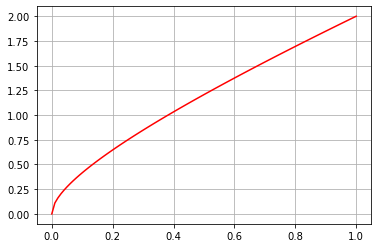

In [28]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,1,100)
y = func(x)
plt.plot(x,y, c='r')
plt.grid()

## Más sobre expresiones:

*Sympy* contiene funciones para matrices, funciones indefinidas, derivadas, ecuaciones diferenciales, etc. Las funciones a continuación son sólo algunos ejemplos de todas las operaciones que soporta esta librería, para conocer todo lo que se puede hacer con ella lo mejor es referirse a la documentación, *GitHub*, *YouTube* o cualquier otro tutorial disponible en la web.

### Matrices

Las matrices pueden crearse con listas anidadas y la función ```Matrix()```, pueden contener otras expresiones y soportan distintas operaciones:

In [33]:
M = smp.Matrix([[1,0,1],[-1,2,3],[1,2,3]])
M

⎡1   0  1⎤
⎢        ⎥
⎢-1  2  3⎥
⎢        ⎥
⎣1   2  3⎦

In [34]:
v = smp.Matrix([x,y,z])
M*v

⎡    x + z     ⎤
⎢              ⎥
⎢-x + 2⋅y + 3⋅z⎥
⎢              ⎥
⎣x + 2⋅y + 3⋅z ⎦

### Funciones indefinidas

Se definen con ```Function()``` y son útiles para indicar que una variable depende de otra sin especificar la expresión, esto es práctico en algunos problemas de diferenciación

In [32]:
f = smp.Function('f')
f(x) + f(y) # El dominio puede ser asignado de definir la función